# Let's Start!

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch

# Set the plotting style to 'ggplot'
plt.style.use('ggplot')

# Import the Natural Language Toolkit (nltk)
import nltk

# Read a CSV file into a pandas DataFrame
# Note: Replace the file path with the correct path to your CSV file
df = pd.read_csv(r"/kaggle/input/amazons-protein-powder-product-reviews-en/english_reviews.csv", index_col=0)

# Display the DataFrame
df


,asin,user_name,review_star,review_title,review,product_type,location,date
0,B01N9V32X2,Professional Consumer,5.0,Tastes so good!,I have been using Ascent 100% Whey Protein Pow...,Flavor Name: Vanilla,the United States,2023-03-02
1,B01N9V32X2,KMD,5.0,Tastes great,"Good quality ingredients, great taste, mixes e...",Flavor Name: Vanilla,the United States,2023-10-25
2,B01N9V32X2,R.C. Christian,5.0,Delicious and everything a pure protein powder...,I highly rate the quality and integrity of thi...,Flavor Name: Chocolate,the United States,2023-12-09
3,B01N9V32X2,Amazon Customer,5.0,Clean protein,This protein powder mixes well without a blend...,Flavor Name: Vanilla,the United States,2023-10-31
4,B01N9V32X2,Matthew,4.0,Great tasting and Clean Protein!,Just bought Ascent 100% Whey Protein Powder wi...,Flavor Name: Chocolate,the United States,2023-05-16
...,...,...,...,...,...,...,...,...
3745,B09685F9D1,Jazz Gaetaniello,5.0,Good for light beverages,Powerful little thing. Great for light beverag...,Color: Grey,the United States,2021-10-13
3746,B09685F9D1,A. Dabbraccio,1.0,Poor wire quality and soldering,Didn't use it for two weeks and it's dead agai...,Color: White,the United States,2022-05-22
3747,B09685F9D1,Tiffany,5.0,Super cute & does the job,"Use this to mix my pre-workout, works really w...",Color: Pink,the United States,2022-12-28
3748,B09685F9D1,Wilmer Lavaire,5.0,Bueno,Bueno,Color: Pink,the United States,2022-12-07


# Convert Columns...

In [3]:
# Display information about the DataFrame, including data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3715 entries, 0 to 3749
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   asin          3715 non-null   object 
 1   user_name     3715 non-null   object 
 2   review_star   3715 non-null   float64
 3   review_title  3714 non-null   object 
 4   review        3713 non-null   object 
 5   product_type  3715 non-null   object 
 6   location      3715 non-null   object 
 7   date          3715 non-null   object 
dtypes: float64(1), object(7)
memory usage: 261.2+ KB


In [4]:
# Convert the "review" column to the 'string' data type
df["review"] = df["review"].astype("string")

# Convert the "date" column to the datetime data type using the specified format
df["date"] = pd.to_datetime(df["date"], format="%Y-%m-%d")


# Control Null Values...

In [5]:
# Check for null values in the DataFrame and display the sum of null values for each column
df.isnull().sum()


asin            0
user_name       0
review_star     0
review_title    1
review          2
product_type    0
location        0
date            0
dtype: int64

In [6]:
# Drop rows where either the "review" or "review_title" columns contain null values
df = df.dropna(subset=["review", "review_title"])


# Sentiment Analysis w\ VADER...

In [7]:
# Import the SentimentIntensityAnalyzer class from the nltk library
from nltk.sentiment import SentimentIntensityAnalyzer

# Import tqdm for progress tracking
from tqdm.notebook import tqdm

# Create an instance of SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()


/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [8]:
# Initialize an empty dictionary to store sentiment scores
vader_scores = {}

# Initialize an empty dictionary to store sentiment scores
vader_scores = {}

# Iterate through the rows of the DataFrame using tqdm for progress tracking
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        # Extract the review text from the "review" column
        review = row["review"]
        
        # Analyze the sentiment using the SentimentIntensityAnalyzer
        sentiment_scores = sia.polarity_scores(review)
        
        # Store the sentiment scores in the dictionary with the row index as the key
        vader_scores[i] = sentiment_scores

    except Exception as e:
        # Handle exceptions and print an error message
        print(f"Error at index {i}: {e}")




  0%|          | 0/3713 [00:00<?, ?it/s]

# Merge the Vader Scores w\ Original df...

In [9]:
# Create a new DataFrame 'vaders' from the sentiment scores dictionary and transpose it
vaders = pd.DataFrame(vader_scores).T

# Merge 'vaders' with the original DataFrame 'df' using the row indices
vaders = vaders.merge(df, how="left", left_index=True, right_index=True)

# Display the merged DataFrame
vaders


,neg,neu,pos,compound,asin,user_name,review_star,review_title,review,product_type,location,date
0,0.029,0.708,0.263,0.9963,B01N9V32X2,Professional Consumer,5.0,Tastes so good!,I have been using Ascent 100% Whey Protein Pow...,Flavor Name: Vanilla,the United States,2023-03-02
1,0.000,0.498,0.502,0.9201,B01N9V32X2,KMD,5.0,Tastes great,"Good quality ingredients, great taste, mixes e...",Flavor Name: Vanilla,the United States,2023-10-25
2,0.133,0.684,0.183,0.5729,B01N9V32X2,R.C. Christian,5.0,Delicious and everything a pure protein powder...,I highly rate the quality and integrity of thi...,Flavor Name: Chocolate,the United States,2023-12-09
3,0.000,0.846,0.154,0.8591,B01N9V32X2,Amazon Customer,5.0,Clean protein,This protein powder mixes well without a blend...,Flavor Name: Vanilla,the United States,2023-10-31
4,0.063,0.713,0.224,0.9502,B01N9V32X2,Matthew,4.0,Great tasting and Clean Protein!,Just bought Ascent 100% Whey Protein Powder wi...,Flavor Name: Chocolate,the United States,2023-05-16
...,...,...,...,...,...,...,...,...,...,...,...,...
3745,0.000,0.583,0.417,0.8939,B09685F9D1,Jazz Gaetaniello,5.0,Good for light beverages,Powerful little thing. Great for light beverag...,Color: Grey,the United States,2021-10-13
3746,0.056,0.862,0.082,0.2593,B09685F9D1,A. Dabbraccio,1.0,Poor wire quality and soldering,Didn't use it for two weeks and it's dead agai...,Color: White,the United States,2022-05-22
3747,0.000,0.746,0.254,0.7569,B09685F9D1,Tiffany,5.0,Super cute & does the job,"Use this to mix my pre-workout, works really w...",Color: Pink,the United States,2022-12-28
3748,0.000,1.000,0.000,0.0000,B09685F9D1,Wilmer Lavaire,5.0,Bueno,Bueno,Color: Pink,the United States,2022-12-07


# Renamed Columns to Understand Better...

In [36]:
vaders = vaders.rename(columns={"neg":"vader_neg",
                       "neu":"vader_neu",
                       "pos":"vader_pos",
                               "compound":"vader_compound"})

# Compound Score by Amazon Star Review in Barplot...

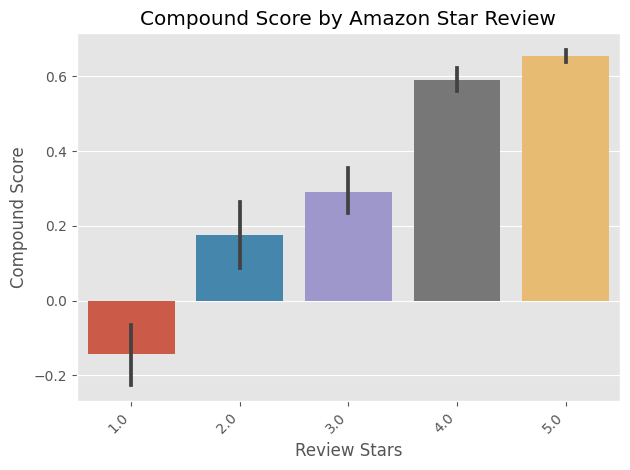

In [10]:
# Use Seaborn to create a bar plot
sns.barplot(data=vaders, x="review_star", y="vader_compound")

# Set plot title
plt.title("Compound Score by Amazon Star Review")

# Set x-axis label
plt.xlabel("Review Stars")

# Set y-axis label
plt.ylabel("Compound Score")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Adjust layout for better visualization
plt.tight_layout()

# Display the plot
plt.show()


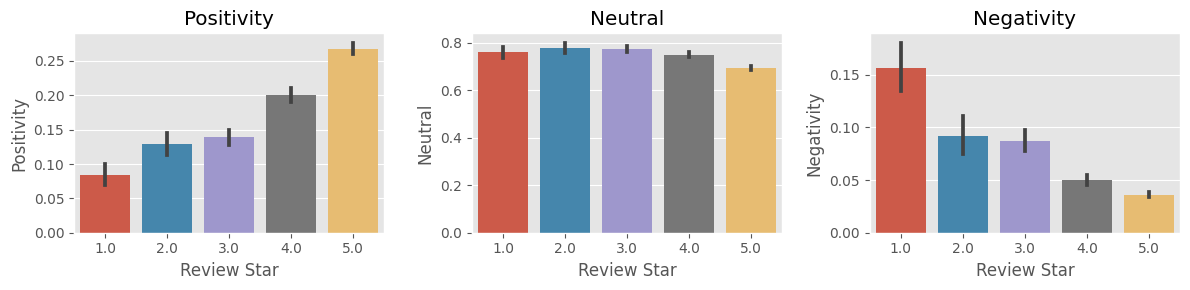

In [11]:
# Create subplots with 1 row and 3 columns
fig, axs = plt.subplots(1, 3, figsize=(12, 3))

# Bar plot for Positivity
sns.barplot(data=vaders, x="review_star", y="pos", ax=axs[0])
axs[0].set_title("Positivity")
axs[0].set(xlabel="Review Star", ylabel="Positivity")

# Bar plot for Neutrality
sns.barplot(data=vaders, x="review_star", y="neu", ax=axs[1])
axs[1].set_title("Neutral")
axs[1].set(xlabel="Review Star", ylabel="Neutral")

# Bar plot for Negativity
sns.barplot(data=vaders, x="review_star", y="neg", ax=axs[2])
axs[2].set_title("Negativity")
axs[2].set(xlabel="Review Star", ylabel="Negativity")

# Adjust layout for better visualization
plt.tight_layout()

# Display the plots
plt.show()


# Sentiment Analysis w\ RoBERTa..

In [12]:
# Import necessary modules from the transformers library
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax

# Define the pre-trained sentiment analysis model
MODEL = "cardiffnlp/twitter-roberta-base-sentiment"

# Initialize a tokenizer for the specified pre-trained model
tokenizer = AutoTokenizer.from_pretrained(MODEL)

# Initialize a model for sequence classification using the pre-trained weights
model = AutoModelForSequenceClassification.from_pretrained(MODEL)


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [13]:
error_indices = []  
roberta_dict = {}

def polarity_scores_roberta(df):
    
    global error_indices 
    global roberta_dict

    for i, row in tqdm(df.iterrows(), total=len(df)):
        try:
            review = row["review"]
            encoded_text = tokenizer(review, return_tensors='pt')
            output = model(**encoded_text)
            scores = output.logits.detach().numpy()
            scores = softmax(scores, axis=1)
            roberta_dict[i] = {
                "roberta_neg": scores[0][0],
                "roberta_neu": scores[0][1],
                "roberta_pos": scores[0][2]
            }
        except Exception as e:
            print(f"Error at index {i}: {e}")
            error_indices.append(i)

    return roberta_dict


result = polarity_scores_roberta(df)
result

  0%|          | 0/3713 [00:00<?, ?it/s]

Error at index 11: The expanded size of the tensor (840) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 840].  Tensor sizes: [1, 514]
Error at index 12: The expanded size of the tensor (789) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 789].  Tensor sizes: [1, 514]
Error at index 14: The expanded size of the tensor (522) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 522].  Tensor sizes: [1, 514]
Error at index 15: The expanded size of the tensor (556) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 556].  Tensor sizes: [1, 514]
Error at index 46: The expanded size of the tensor (775) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 775].  Tensor sizes: [1, 514]
Error at index 87: The expanded size of the tensor (559) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 559]

{0: {'roberta_neg': 0.0019696832,
  'roberta_neu': 0.023345254,
  'roberta_pos': 0.97468513},
 1: {'roberta_neg': 0.0019954373,
  'roberta_neu': 0.05282103,
  'roberta_pos': 0.9451836},
 2: {'roberta_neg': 0.022188509,
  'roberta_neu': 0.13855475,
  'roberta_pos': 0.83925676},
 3: {'roberta_neg': 0.0026963365,
  'roberta_neu': 0.062246196,
  'roberta_pos': 0.93505746},
 4: {'roberta_neg': 0.0983475,
  'roberta_neu': 0.22139287,
  'roberta_pos': 0.68025964},
 5: {'roberta_neg': 0.002610546,
  'roberta_neu': 0.016656728,
  'roberta_pos': 0.98073274},
 6: {'roberta_neg': 0.0012226454,
  'roberta_neu': 0.021461032,
  'roberta_pos': 0.9773163},
 7: {'roberta_neg': 0.0013484239,
  'roberta_neu': 0.013725836,
  'roberta_pos': 0.9849258},
 8: {'roberta_neg': 0.026278038,
  'roberta_neu': 0.1331397,
  'roberta_pos': 0.84058225},
 9: {'roberta_neg': 0.0037829548,
  'roberta_neu': 0.091375984,
  'roberta_pos': 0.90484107},
 10: {'roberta_neg': 0.005516703,
  'roberta_neu': 0.029896924,
  'roberta

In [14]:
roberta_dict_df = pd.DataFrame(roberta_dict).T

# **Handling Reviews with More than 512 Tokens**

In my sentiment analysis project, I encountered an issue with certain reviews having more than 512 tokens, surpassing the maximum sequence length supported by the RoBERTa model. To efficiently address this, I implemented the following solution:

1. **Issue Identification:**
The RoBERTa model has a maximum sequence length of 512 tokens.
Some reviews in the dataset exceeded this limit, leading to processing errors.
2. **Storing Error Indices:**
During the initial sentiment analysis using the polarity_scores_roberta function, I stored the indices of reviews that would cause errors in the "error_indices" list.
3. **Processing Only Error Indices:**
I created the polarity_scores_roberta_split function to process only the reviews with more than 512 tokens, utilizing the process_long_text function for handling lengthy texts.
The function selectively processes reviews based on the error indices stored earlier.
4. **Integration with Sentiment Analysis:**
I combined the sentiment analysis results from both functions to ensure a comprehensive analysis of all reviews.
5. **Error Handling:**
Exception handling is implemented to capture any errors during the processing of reviews in both functions.
6. **Results:**
As a result, both dictionaries were dataframed, merged, and finally combine with the original dataframe.

In [15]:
# Select only the reviews that caused errors during the initial processing
selected_df = df.loc[error_indices]
selected_df

,asin,user_name,review_star,review_title,review,product_type,location,date
11,B007SYSQ7K,Mary S.,5.0,The proof is in the results. How do you feel? ...,After having tremendous problems with immune s...,Flavor Name: Chocolate,the United States,2013-03-21
12,B007SYSQ7K,J. Krishnaswami,4.0,"Neutral taste, good source of vegan non-soy pr...","If you're looking for a non-GMO, non-heated, n...",Flavor Name: Unflavored,the United States,2012-11-29
14,B007SYSQ7K,Shoppinurse,5.0,"The Closest Thing to a Raw, Vegan Meal",I think I've tried all the vegan protein powde...,Flavor Name: Unflavored,the United States,2012-01-16
15,B007SYSQ7K,JP,1.0,False advertisement with continual decline in ...,Update (2023): Nestle is a wicked corporation ...,Flavor Name: Vanilla Chai,the United States,2023-10-02
46,B007SYSQ7K,evemarie,5.0,I'm using this while chelating and so far it's...,I LOVE THIS PRODUCT! it has a good taste beca...,Flavor Name: Unflavored,the United States,2015-02-25
87,B007SYSQ7K,AbigailE16,4.0,Acquired taste...,I purchased this product because of the solid ...,Flavor Name: Unflavored,the United States,2012-08-09
101,B007SYSQ7K,L. Ludwig,4.0,Whole Protein source at good price,I had been taking whey protein powder and my l...,Flavor Name: Chocolate,the United States,2013-06-23
107,B007SYSQ7K,Soup,4.0,Unflavored taste gets some getting use to but ...,I've been using whey protein powders but they ...,Flavor Name: Unflavored,the United States,2013-11-14
214,B01NAEHLFO,Lincoln,5.0,Very potent Flavor. Digests well.,There are some important things to realize abo...,Flavor Name: Vanilla,the United States,2017-02-23
233,B01NAEHLFO,C wade,5.0,but it says bcaa’s and glutamine and I like th...,It’s been a few YEARS since I’ve gotten whey p...,Flavor Name: Vanilla,the United States,2018-05-11


In [30]:
max_seq_length = 512

def process_long_text(review):
    tokens = tokenizer.encode_plus(review, add_special_tokens=False, return_tensors='pt')

    
    if tokens['input_ids'].size()[1] > max_seq_length:
        tokens['input_ids'] = tokens['input_ids'][:, :max_seq_length]
        tokens['attention_mask'] = tokens['attention_mask'][:, :max_seq_length]

    return tokens

In [19]:
roberta_dict_split = {}

def polarity_scores_roberta_split(df):
    global roberta_dict_split  

    for i, row in tqdm(df.iterrows(), total=len(df)):
        try:
            review = row["review"]
            tokens = process_long_text(review)
            
            input_ids = tokens['input_ids']
            attention_mask = tokens['attention_mask']

            input_dict = {'input_ids': input_ids.long(), 'attention_mask': attention_mask.int()}
            output = model(**input_dict)

            probs = torch.nn.functional.softmax(output.logits, dim=-1)  
            probs = probs.mean(dim=0)
            probs_list = probs.tolist()
            
            roberta_dict_split[i] = {
                "roberta_neg": probs_list[0],  
                "roberta_neu": probs_list[1],  
                "roberta_pos": probs_list[2]   
            }
        except Exception as e:
            print(f"Error at index {i}: {e}")

    return roberta_dict_split

result = polarity_scores_roberta_split(selected_df)
result


  0%|          | 0/53 [00:00<?, ?it/s]

{11: {'roberta_neg': 0.24836036562919617,
  'roberta_neu': 0.39825525879859924,
  'roberta_pos': 0.35338446497917175},
 12: {'roberta_neg': 0.0341799333691597,
  'roberta_neu': 0.232866570353508,
  'roberta_pos': 0.7329534888267517},
 14: {'roberta_neg': 0.047835513949394226,
  'roberta_neu': 0.21805121004581451,
  'roberta_pos': 0.7341132760047913},
 15: {'roberta_neg': 0.8612990379333496,
  'roberta_neu': 0.12414596974849701,
  'roberta_pos': 0.014554992318153381},
 46: {'roberta_neg': 0.4536134898662567,
  'roberta_neu': 0.38912829756736755,
  'roberta_pos': 0.15725822746753693},
 87: {'roberta_neg': 0.2583363354206085,
  'roberta_neu': 0.3721151649951935,
  'roberta_pos': 0.369548499584198},
 101: {'roberta_neg': 0.34746623039245605,
  'roberta_neu': 0.449588805437088,
  'roberta_pos': 0.20294493436813354},
 107: {'roberta_neg': 0.36476457118988037,
  'roberta_neu': 0.44470012187957764,
  'roberta_pos': 0.19053536653518677},
 214: {'roberta_neg': 0.18986470997333527,
  'roberta_neu

In [20]:
roberta_dict_split_df = pd.DataFrame(roberta_dict_split).T

# Combined Dataframes...

In [21]:
# Concatenate the two DataFrames and sort by index
roberta_combined = pd.concat([roberta_dict_df, roberta_dict_split_df]).sort_index()

# Display the first 25 rows of the combined DataFrame
roberta_combined.head(25)

,roberta_neg,roberta_neu,roberta_pos
0,0.001970,0.023345,0.974685
1,0.001995,0.052821,0.945184
2,0.022189,0.138555,0.839257
3,0.002696,0.062246,0.935057
4,0.098347,0.221393,0.680260
5,0.002611,0.016657,0.980733
6,0.001223,0.021461,0.977316
7,0.001348,0.013726,0.984926
8,0.026278,0.133140,0.840582
9,0.003783,0.091376,0.904841


In [22]:
# Merge sentiment analysis scores with the original DataFrame based on indices
roberta_scores = roberta_combined.merge(df, how="left", left_index=True, right_index=True)

# Display the resulting DataFrame
roberta_scores

,roberta_neg,roberta_neu,roberta_pos,asin,user_name,review_star,review_title,review,product_type,location,date
0,0.001970,0.023345,0.974685,B01N9V32X2,Professional Consumer,5.0,Tastes so good!,I have been using Ascent 100% Whey Protein Pow...,Flavor Name: Vanilla,the United States,2023-03-02
1,0.001995,0.052821,0.945184,B01N9V32X2,KMD,5.0,Tastes great,"Good quality ingredients, great taste, mixes e...",Flavor Name: Vanilla,the United States,2023-10-25
2,0.022189,0.138555,0.839257,B01N9V32X2,R.C. Christian,5.0,Delicious and everything a pure protein powder...,I highly rate the quality and integrity of thi...,Flavor Name: Chocolate,the United States,2023-12-09
3,0.002696,0.062246,0.935057,B01N9V32X2,Amazon Customer,5.0,Clean protein,This protein powder mixes well without a blend...,Flavor Name: Vanilla,the United States,2023-10-31
4,0.098347,0.221393,0.680260,B01N9V32X2,Matthew,4.0,Great tasting and Clean Protein!,Just bought Ascent 100% Whey Protein Powder wi...,Flavor Name: Chocolate,the United States,2023-05-16
...,...,...,...,...,...,...,...,...,...,...,...
3745,0.001252,0.020132,0.978616,B09685F9D1,Jazz Gaetaniello,5.0,Good for light beverages,Powerful little thing. Great for light beverag...,Color: Grey,the United States,2021-10-13
3746,0.545881,0.330012,0.124107,B09685F9D1,A. Dabbraccio,1.0,Poor wire quality and soldering,Didn't use it for two weeks and it's dead agai...,Color: White,the United States,2022-05-22
3747,0.001861,0.033816,0.964323,B09685F9D1,Tiffany,5.0,Super cute & does the job,"Use this to mix my pre-workout, works really w...",Color: Pink,the United States,2022-12-28
3748,0.215122,0.548579,0.236299,B09685F9D1,Wilmer Lavaire,5.0,Bueno,Bueno,Color: Pink,the United States,2022-12-07


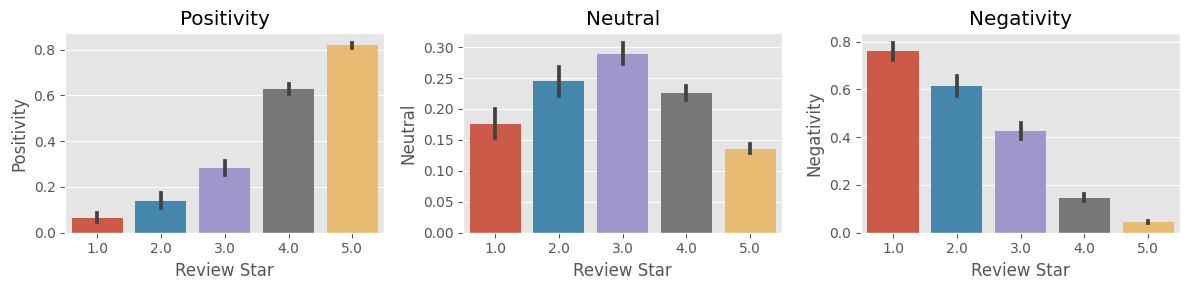

In [42]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))

sns.barplot(data=roberta_scores, x="review_star", y="roberta_pos", ax=axs[0])
axs[0].set_title("Positivity")
axs[0].set(xlabel="Review Star", ylabel="Positivity")


sns.barplot(data=roberta_scores, x="review_star", y="roberta_neu", ax=axs[1])
axs[1].set_title("Neutral")
axs[1].set(xlabel="Review Star", ylabel="Neutral")

sns.barplot(data=roberta_scores, x="review_star", y="roberta_neg", ax=axs[2])
axs[2].set_title("Negativity")
axs[2].set(xlabel="Review Star", ylabel="Negativity")

plt.tight_layout()
plt.show()

# Visualization and Analysis with Graphs...

In [38]:
# Combined two models in dataframe...
roberta_and_vader= roberta_combined.merge(vaders, how="left", left_index=True, right_index=True)
roberta_and_vader

,roberta_neg,roberta_neu,roberta_pos,vader_neg,vader_neu,vader_pos,vader_compound,asin,user_name,review_star,review_title,review,product_type,location,date
0,0.001970,0.023345,0.974685,0.029,0.708,0.263,0.9963,B01N9V32X2,Professional Consumer,5.0,Tastes so good!,I have been using Ascent 100% Whey Protein Pow...,Flavor Name: Vanilla,the United States,2023-03-02
1,0.001995,0.052821,0.945184,0.000,0.498,0.502,0.9201,B01N9V32X2,KMD,5.0,Tastes great,"Good quality ingredients, great taste, mixes e...",Flavor Name: Vanilla,the United States,2023-10-25
2,0.022189,0.138555,0.839257,0.133,0.684,0.183,0.5729,B01N9V32X2,R.C. Christian,5.0,Delicious and everything a pure protein powder...,I highly rate the quality and integrity of thi...,Flavor Name: Chocolate,the United States,2023-12-09
3,0.002696,0.062246,0.935057,0.000,0.846,0.154,0.8591,B01N9V32X2,Amazon Customer,5.0,Clean protein,This protein powder mixes well without a blend...,Flavor Name: Vanilla,the United States,2023-10-31
4,0.098347,0.221393,0.680260,0.063,0.713,0.224,0.9502,B01N9V32X2,Matthew,4.0,Great tasting and Clean Protein!,Just bought Ascent 100% Whey Protein Powder wi...,Flavor Name: Chocolate,the United States,2023-05-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3745,0.001252,0.020132,0.978616,0.000,0.583,0.417,0.8939,B09685F9D1,Jazz Gaetaniello,5.0,Good for light beverages,Powerful little thing. Great for light beverag...,Color: Grey,the United States,2021-10-13
3746,0.545881,0.330012,0.124107,0.056,0.862,0.082,0.2593,B09685F9D1,A. Dabbraccio,1.0,Poor wire quality and soldering,Didn't use it for two weeks and it's dead agai...,Color: White,the United States,2022-05-22
3747,0.001861,0.033816,0.964323,0.000,0.746,0.254,0.7569,B09685F9D1,Tiffany,5.0,Super cute & does the job,"Use this to mix my pre-workout, works really w...",Color: Pink,the United States,2022-12-28
3748,0.215122,0.548579,0.236299,0.000,1.000,0.000,0.0000,B09685F9D1,Wilmer Lavaire,5.0,Bueno,Bueno,Color: Pink,the United States,2022-12-07


In [43]:
roberta_desc = roberta_and_vader[["roberta_neg","roberta_neu","roberta_pos"]].describe()
roberta_desc

,roberta_neg,roberta_neu,roberta_pos
count,3713.000000,3713.000000,3713.000000
mean,0.166673,0.177920,0.655406
std,0.280001,0.184016,0.362914
min,0.000825,0.005235,0.001847
25%,0.002915,0.030560,0.287208
50%,0.014760,0.103087,0.848835
75%,0.190765,0.296955,0.963752
max,0.982651,0.894624,0.993236


In [45]:
vader_desc = roberta_and_vader[["vader_neg","vader_neu","vader_pos"]].describe()
vader_desc

,vader_neg,vader_neu,vader_pos
count,3713.000000,3713.000000,3713.000000
mean,0.052763,0.722253,0.224715
std,0.081559,0.170299,0.177393
min,0.000000,0.000000,0.000000
25%,0.000000,0.652000,0.112000
50%,0.028000,0.753000,0.186000
75%,0.076000,0.825000,0.294000
max,1.000000,1.000000,1.000000


In [53]:
pos_correlation = roberta_and_vader["vader_pos"].corr(roberta_and_vader["roberta_pos"])
neg_correlation = roberta_and_vader["vader_neg"].corr(roberta_and_vader["roberta_neg"])

print(f"Positive Sentiment Correlation: {pos_correlation}")
print(f"Negative Sentiment Correlation: {neg_correlation}")


Positive Sentiment Correlation: 0.48321484880493026
Negative Sentiment Correlation: 0.4585687843838681


*The both correlation of 0.48 and 0.45 suggests a moderate association between the positive sentiment scores generated by VADER and RoBERTa. 
Both models show similarities in recognizing and assigning positive sentiments, indicating a moderate level of agreement in capturing positive aspects in the analyzed data.*

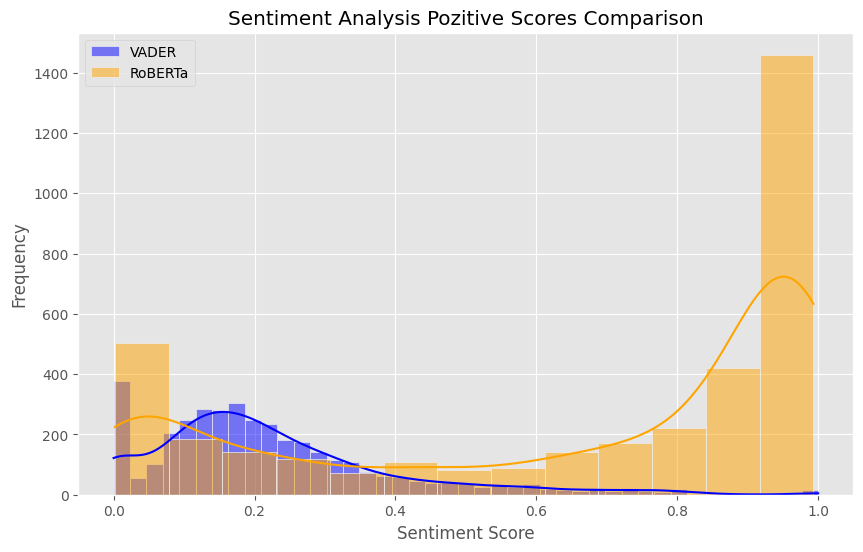

In [57]:
plt.figure(figsize=(10, 6))

# VADER histogram
sns.histplot(data = roberta_and_vader["vader_pos"], kde=True, label="VADER", color="blue")

# RoBERTa histogram
sns.histplot(data =roberta_and_vader["roberta_pos"] ,kde=True, label="RoBERTa", color="orange")

plt.title("Sentiment Analysis Pozitive Scores Comparison")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.legend()
plt.show()

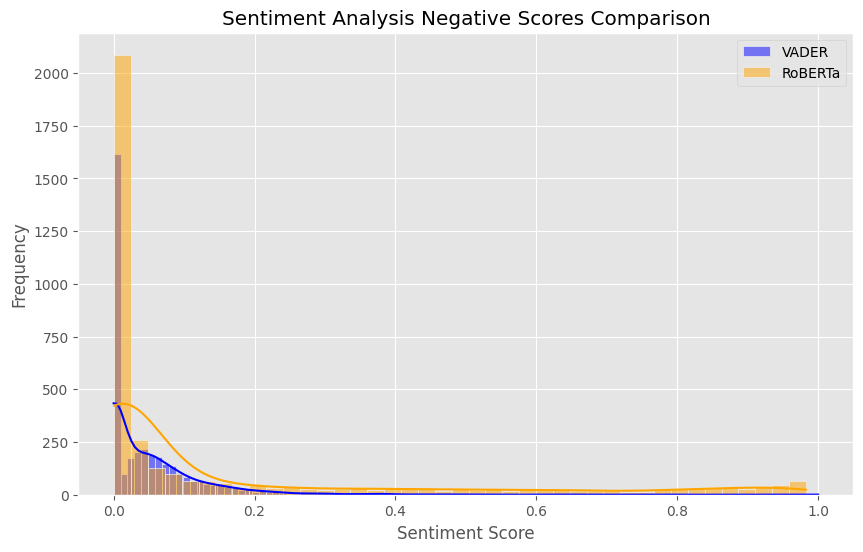

In [56]:
plt.figure(figsize=(10, 6))

# VADER histogram
sns.histplot(data = roberta_and_vader["vader_neg"], kde=True, label="VADER", color="blue")

# RoBERTa histogram
sns.histplot(data =roberta_and_vader["roberta_neg"] ,kde=True, label="RoBERTa", color="orange")

plt.title("Sentiment Analysis Negative Scores Comparison")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.legend()
plt.show()

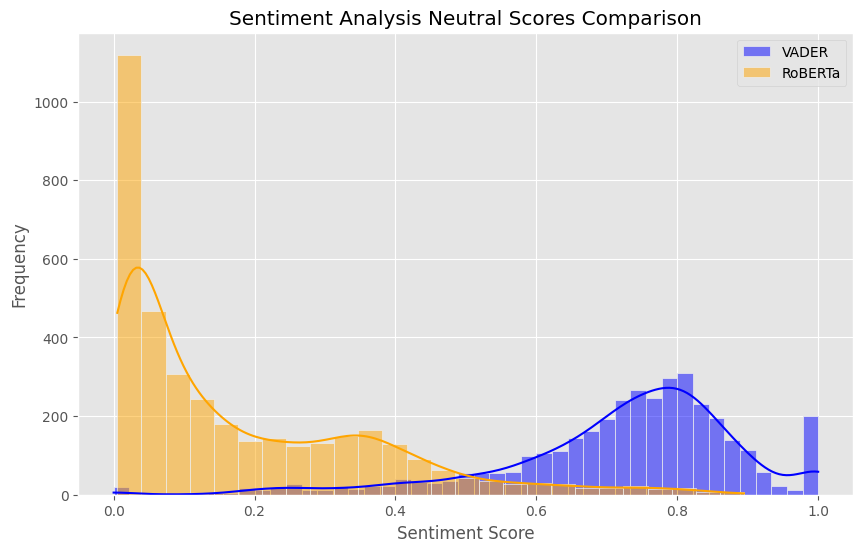

In [60]:
plt.figure(figsize=(10, 6))

#VADER histogram
sns.histplot(data = roberta_and_vader["vader_neu"], kde=True, label="VADER", color="blue")

#RoBERTa histogram
sns.histplot(data =roberta_and_vader["roberta_neu"] ,kde=True, label="RoBERTa", color="orange")

plt.title("Sentiment Analysis Neutral Scores Comparison")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.legend()
plt.show()

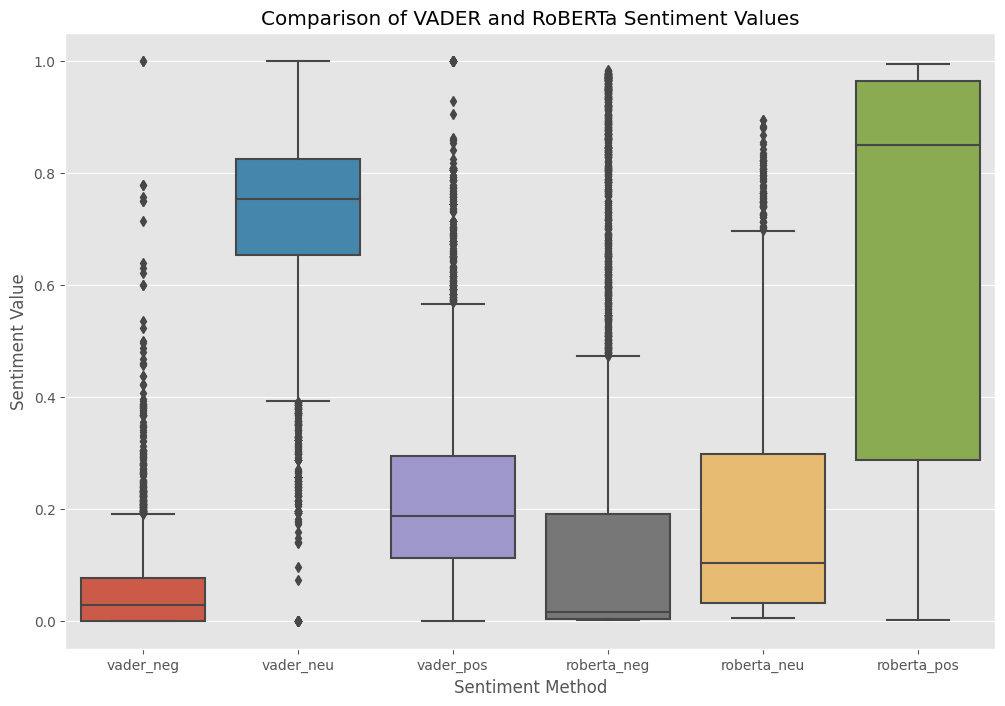

In [69]:
# Melt the DataFrame to reshape it for seaborn boxplot
melted_df = pd.melt(roberta_and_vader,value_vars=['vader_neg', 'vader_neu', 'vader_pos', 'roberta_neg', 'roberta_neu', 'roberta_pos'],
                    var_name='Sentiment Method', value_name='Sentiment Value')

# Create a boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Sentiment Method', y='Sentiment Value', data=melted_df)
plt.title('Comparison of VADER and RoBERTa Sentiment Values')
plt.show()

This chart compares the sentiment analysis values of VADER and RoBERTa, illustrating how they evaluate negative, positive, and neutral sentiments. The boxes and whiskers in the graph represent the distribution and variance of these methods' scores.

This graph can be used to observe the differences and similarities between the two models. For instance, from the graph, we can infer the following:

* VADER assigns higher scores to negative sentiments compared to RoBERTa. This might indicate that VADER interprets negative texts more strongly, or RoBERTa perceives negative texts with a softer approach.
* RoBERTa gives higher scores to neutral sentiments than VADER. This could suggest that RoBERTa perceives neutral texts more positively, or VADER interprets neutral texts more negatively.
* Both models evaluate positive sentiments in a similar manner, indicating proficiency in recognizing positive texts.
* VADER has more outliers compared to RoBERTa. This may suggest that VADER misclassifies some texts, while RoBERTa is more consistent in its predictions.

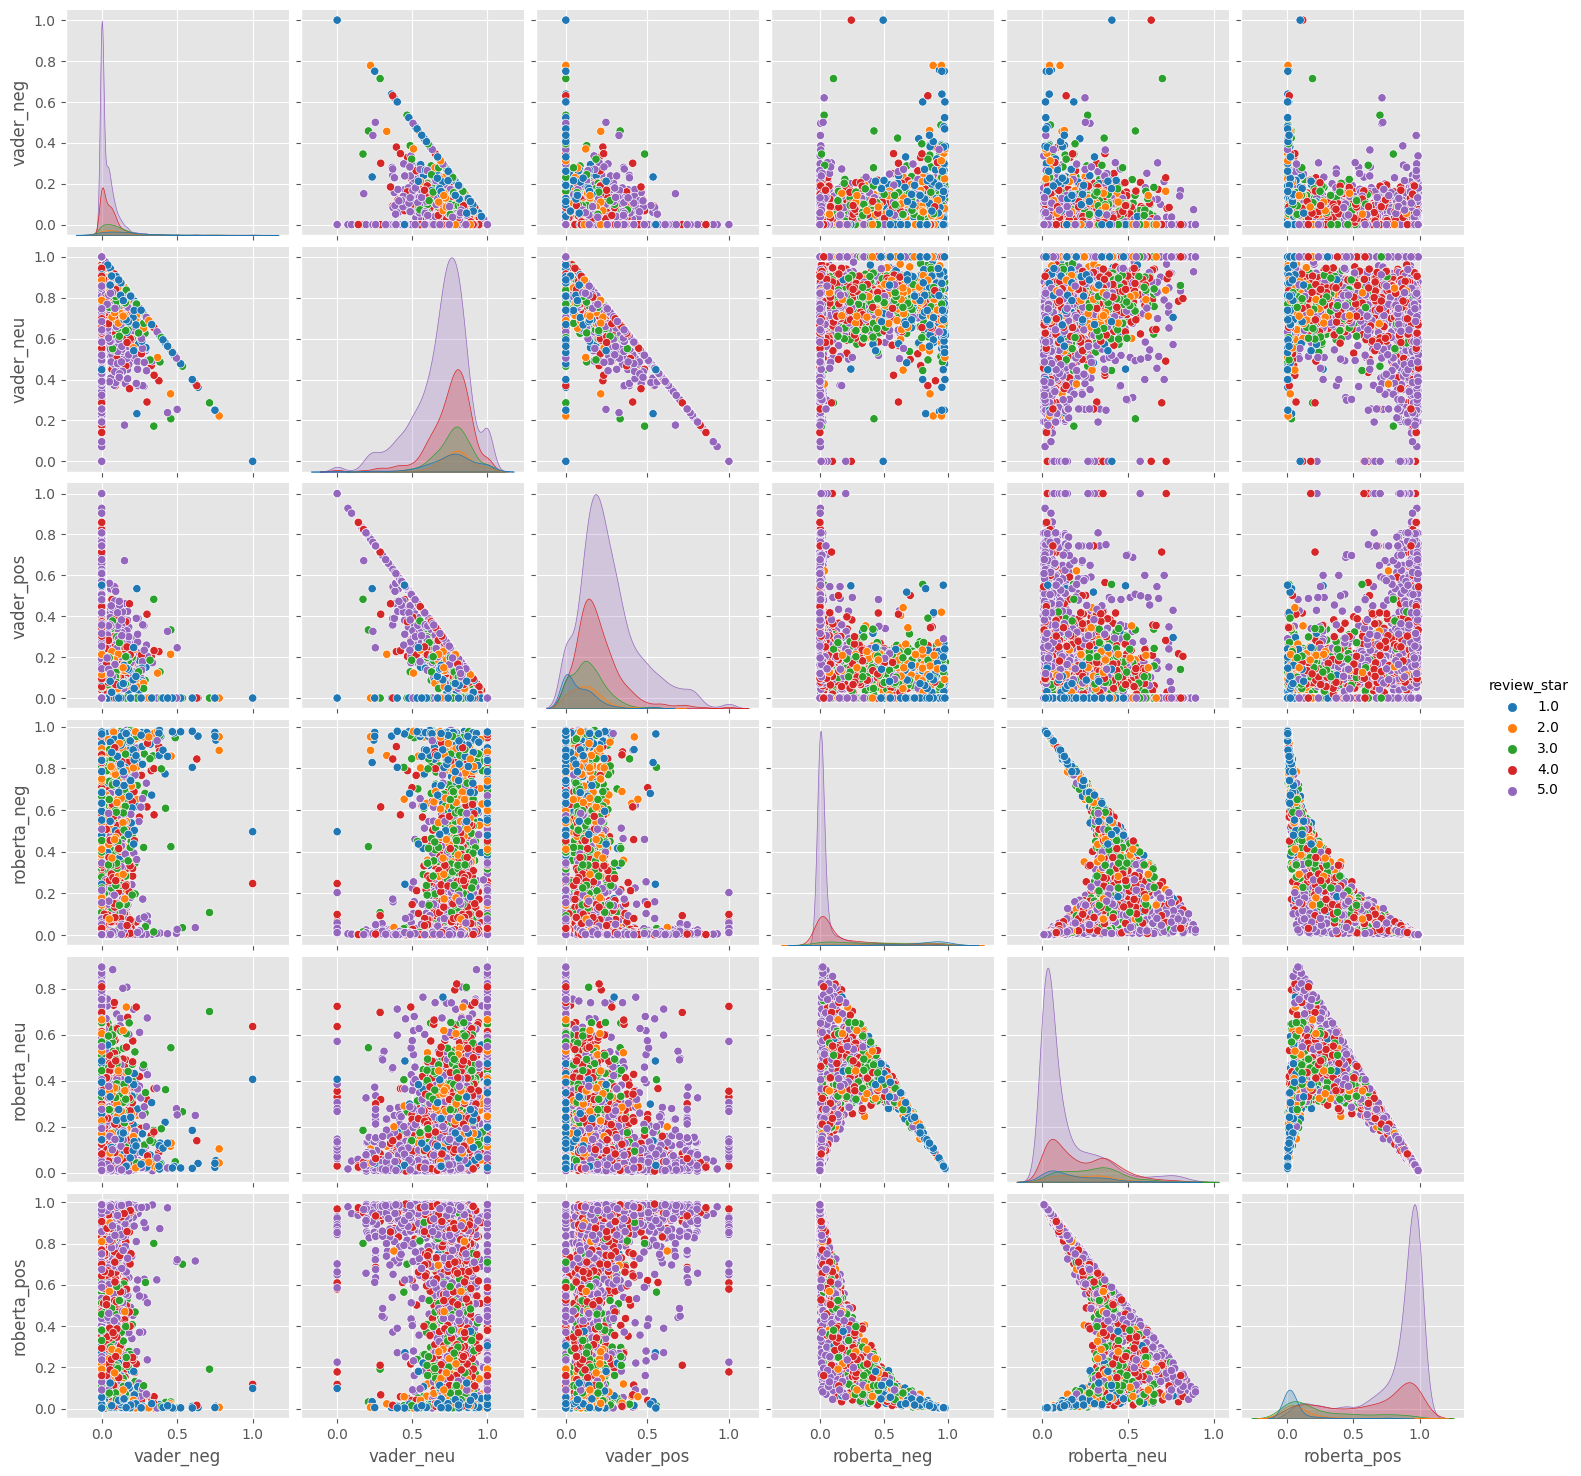

In [87]:
sns.pairplot(data=roberta_and_vader,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='review_star',
            palette='tab10')
plt.show()

**THE END**
                                                                
*If you have any suggestions, questions, or ideas, I’m all ears! Your input is invaluable, and I'm open to collaboration . Feel free to reach out with your feedback!*

[To Reach My Github](http://github.com/omeryurtt/)